[*********************100%%**********************]  1 of 1 completed


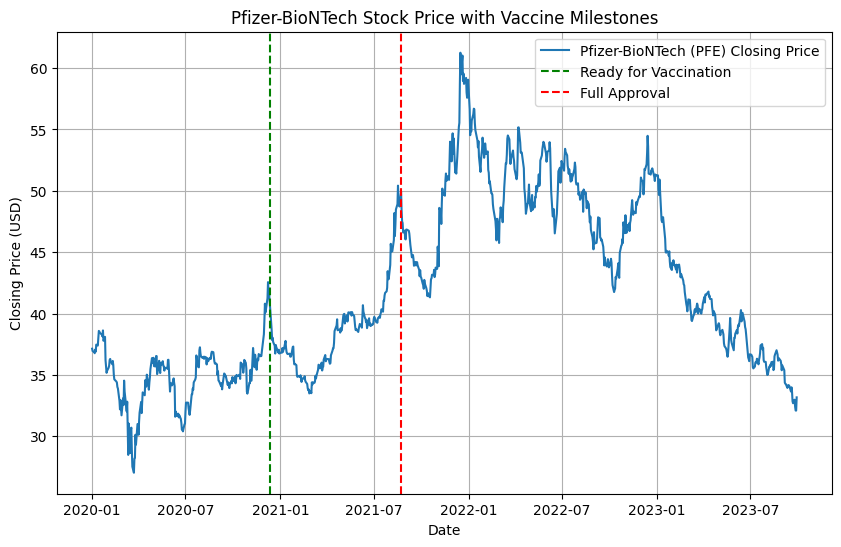

[*********************100%%**********************]  1 of 1 completed


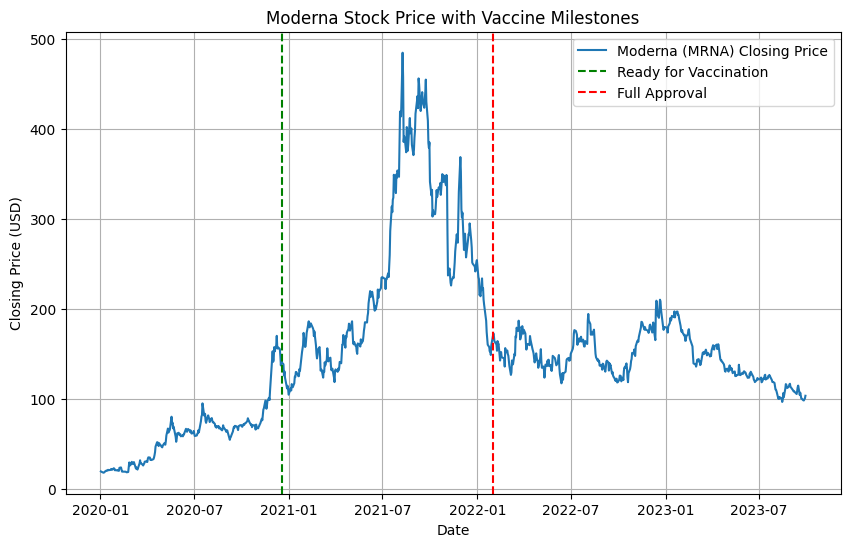

[*********************100%%**********************]  1 of 1 completed


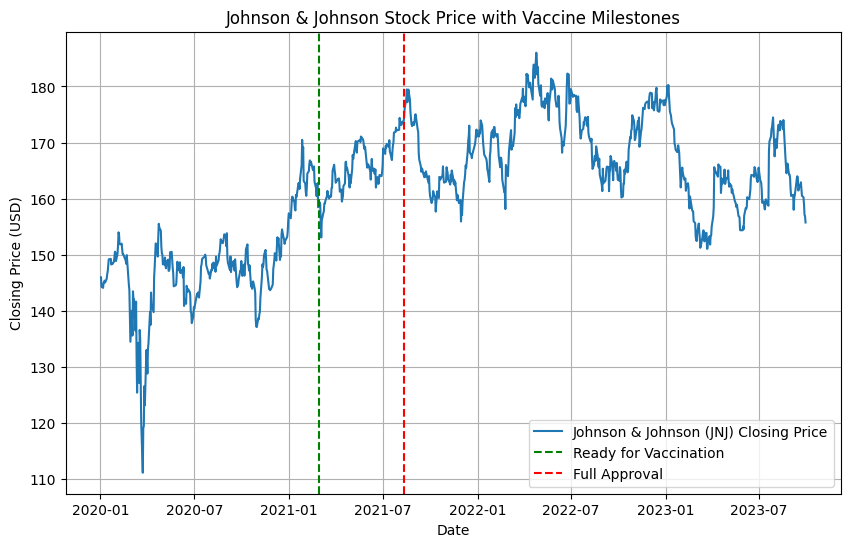

[*********************100%%**********************]  1 of 1 completed


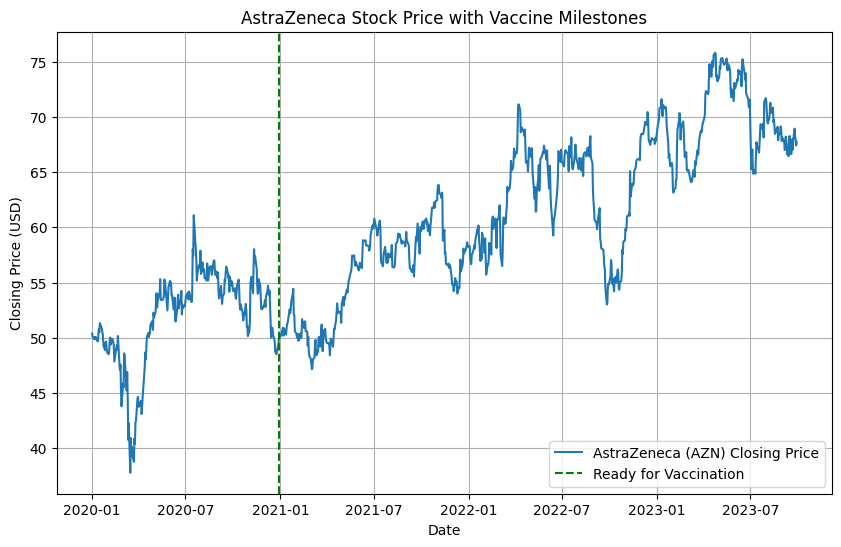

[*********************100%%**********************]  1 of 1 completed


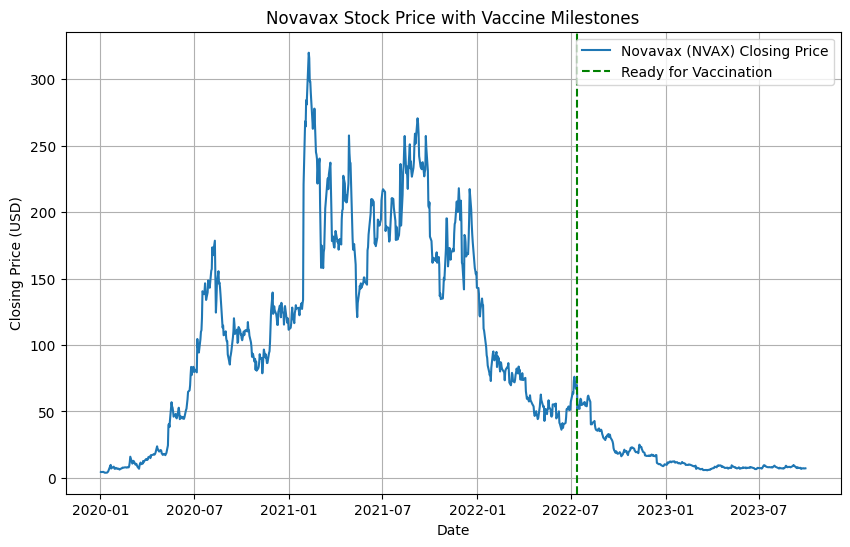

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the pharmaceutical companies and their stock tickers
companies = {
    "Pfizer-BioNTech": "PFE",
    "Moderna": "MRNA",
    "Johnson & Johnson": "JNJ",
    "AstraZeneca": "AZN",
    "Novavax": "NVAX",
    "Sinovac": None,  # Sinovac is not publicly traded
    "Sinopharm": None,  # Sinopharm is not listed on common exchanges
    "Bharat Biotech": None,  # Bharat Biotech is not publicly traded
    "Gamaleya Research Institute": None  # Not publicly traded
}

# Define important dates for each company (ready date and full approval date)
approval_dates = {
    "Pfizer-BioNTech": {
        "ready_date": "2020-12-11",
        "full_approval_date": "2021-08-23   "
    },
    "Moderna": {
        "ready_date": "2020-12-18",
        "full_approval_date": "2022-01-31"
    },
    "Johnson & Johnson": {
        "ready_date": "2021-02-27",
        "full_approval_date": "2021-08-12"
    },
    "AstraZeneca": {
        "ready_date": "2020-12-30",  # UK approval
        "full_approval_date": None  # No full U.S. approval
    },
    "Novavax": {
        "ready_date": "2022-07-13",
        "full_approval_date": None  # Pending
    }
}

# Define the time range for stock data
start_date = "2020-01-01"
end_date = "2023-09-30"

# Download the stock price data and create time series plots
for company, ticker in companies.items():
    if ticker:
        # Download stock data using yfinance
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # Plot the stock price data
        plt.figure(figsize=(10, 6))
        plt.plot(stock_data["Close"], label=f"{company} ({ticker}) Closing Price")

        # Annotate the approval dates on the plot
        dates = approval_dates.get(company, {})
        if dates.get("ready_date"):
            plt.axvline(pd.to_datetime(dates["ready_date"]), color="green", linestyle="--", label="Ready for Vaccination")
        if dates.get("full_approval_date"):
            plt.axvline(pd.to_datetime(dates["full_approval_date"]), color="red", linestyle="--", label="Full Approval")

        # Add labels and title
        plt.title(f"{company} Stock Price with Vaccine Milestones")
        plt.xlabel("Date")
        plt.ylabel("Closing Price (USD)")
        plt.legend()
        plt.grid(True)

        # Show the plot
        plt.show()
